In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import sklearn.preprocessing as skpre
import statsmodels.api as sm

연습문제
==========

문제 1
-------

In [2]:
Data=pd.read_excel("http://data.hossam.kr/E04/beans.xlsx")

In [3]:
data=pd.DataFrame(Data)

### 시각화를 먼저 해보자

In [4]:
import matplotlib.pyplot as plt
plt.rcParams["font.family"]="BM YEONSUNG"

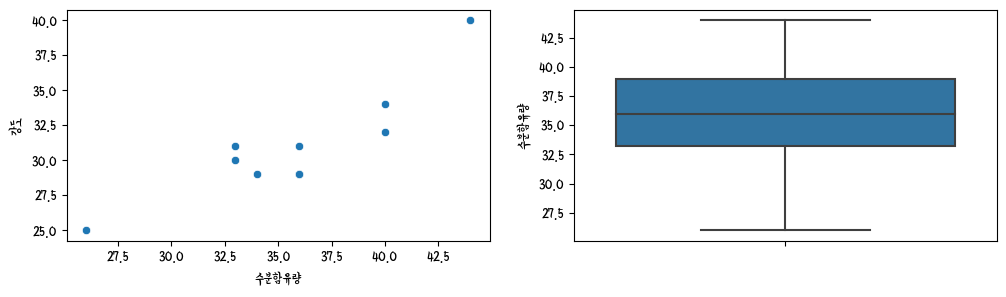

In [5]:
_,a=plt.subplots(1,2,figsize=(12,3))
sb.scatterplot(data,x="수분함유량",y='강도',ax=a[0])
sb.boxplot(y=data["수분함유량"])
plt.show()
plt.close()

다행히 이상치는 없다

### 데이터 분리

In [6]:
import sklearn.model_selection as skmod

In [7]:
#train,test=skmod.train_test_split(data,train_size=0.7,random_state=10)

### 다항식 특성 추가하기
이때 그래프 모양을 보아하니 3차나 1차가 유력해보임

In [8]:
model=skpre.PolynomialFeatures(include_bias=False, degree=3)
fit=model.fit_transform(data[["수분함유량"]])
feature_df=pd.DataFrame(fit,columns=model.get_feature_names_out())
# 상수항을 추가해놓자
feature_df=sm.add_constant(feature_df)

### 회귀분석을 실시

#### 데이터 분리

In [9]:
target="강도"
use_df=pd.merge(data[target],feature_df,right_index=True,left_index=True)

In [10]:
use_df.head(3)

,강도,const,수분함유량,수분함유량^2,수분함유량^3
0,29,1.0,36.0,1296.0,46656.0
1,32,1.0,40.0,1600.0,64000.0
2,29,1.0,34.0,1156.0,39304.0


#### train/test split

In [11]:
train,test=skmod.train_test_split(use_df,train_size=0.7,random_state=10)

In [12]:
fitted_model=sm.OLS(endog=train[target],exog=train[train.columns.difference([target])]).fit()

In [13]:
fitted_model.summary()

c:\Users\SAMSUNG\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     강도   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     17.16
Date:                Mon, 28 Aug 2023   Prob (F-statistic):             0.0216
Time:                        16:19:36   Log-Likelihood:                -8.3862
No. Observations:                   7   AIC:                             24.77
Df Residuals:                       3   BIC:                             24.56
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        217.2857    722.252      0.301      0.783   -2081.241    2515.813
수분함유량        -11.3387     56.997     -0.199      0.855    -192.727     170.050
수분함유량^2        0.1899      1.491      0.127      0.907      -4.556       4.936
수분함유량^3       -0.0005      0.013     -0.042      0.969      -0.042       0.041
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   0.778
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.723
Skew:                           0.000   Prob(JB):                        0.697
Kurtosis:                       1.426   Cond. No.                     8.85e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.85e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### 회귀계수의 문제가 굉장히 많음

#### 3차식부터 조절

In [21]:
test_col_1=train.columns.difference([target])[:-1]
fit_test_1=sm.OLS(exog=train[test_col_1],endog=train[target]).fit()
fit_test_1.summary()

c:\Users\SAMSUNG\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     강도   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                     34.30
Date:                Mon, 28 Aug 2023   Prob (F-statistic):            0.00304
Time:                        16:21:25   Log-Likelihood:                -8.3882
No. Observations:                   7   AIC:                             22.78
Df Residuals:                       4   BIC:                             22.61
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        187.1536     45.825      4.084      0.015      59.923     314.384
수분함유량         -8.9573      2.422     -3.699      0.021     -15.681      -2.233
수분함유량^2        0.1276      0.032      4.020      0.016       0.039       0.216
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   0.779
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.720
Skew:                          -0.002   Prob(JB):                        0.698
Kurtosis:                       1.429   Cond. No.                     1.65e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.65e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### 혹시 모르니 2차식을 제거해보자

In [15]:
test_col_2=[x for x in train.columns.difference([target]) if x!="수분함유량^2"]
fit_test_2=sm.OLS(endog=train[target],exog=train[test_col_2]).fit()
fit_test_2.summary()

c:\Users\SAMSUNG\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     강도   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                     34.12
Date:                Mon, 28 Aug 2023   Prob (F-statistic):            0.00307
Time:                        16:19:36   Log-Likelihood:                -8.4050
No. Observations:                   7   AIC:                             22.81
Df Residuals:                       4   BIC:                             22.65
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        125.4023     30.644      4.092      0.015      40.321     210.484
수분함유량         -4.0813      1.215     -3.359      0.028      -7.454      -0.708
수분함유량^3        0.0011      0.000      4.008      0.016       0.000       0.002
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   0.788
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.697
Skew:                          -0.009   Prob(JB):                        0.706
Kurtosis:                       1.454   Cond. No.                     4.31e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.31e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

근소하게 나마 2차식으로 표현한 것이 3차식 표현보다 AIC가 미묘하게 좋은(작은) 값을 가짐

### 예측시켜보자

In [28]:
# 최종모델 : 3차 제거
pre_test_1=fit_test_1.predict(test[test_col_1])
fitted_test_1=fit_test_1.fittedvalues

In [48]:
train["fitted_value"]=fitted_test_1
test["pred_value"]=pre_test_1

#### 시각화

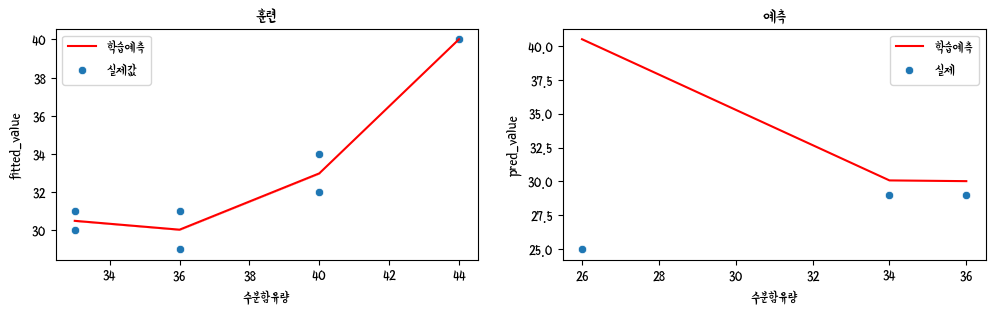

In [66]:
f,a=plt.subplots(1,2,figsize=(12,3))
sb.lineplot(data=train,x="수분함유량",y="fitted_value",ax=a[0],label="학습예측",color="red")
sb.scatterplot(data=train,x="수분함유량",y="강도",ax=a[0],label="실제값")
sb.lineplot(data=test,x="수분함유량",y="pred_value",ax=a[1],label="학습예측",color="red")
sb.scatterplot(data=test,x="수분함유량",y="강도",ax=a[1],label="실제")
a[0].set_title("훈련")
a[1].set_title("예측")
plt.show()
plt.close()